# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


'0.8.0'

In [234]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [235]:
print(df.describe())

            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [236]:
# frequency table for prestige and whether or not someone was admitted

print(pd.crosstab(df['admit'], df['prestige'], rownames = ['admit']))


prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [237]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print (dummy_ranks.head())

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [238]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print (handCalc.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [239]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
print(pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'] ))

prestige_1.0    0   1
admit                
0             243  28
1              93  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [198]:
33/28


1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [199]:
93/243

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [200]:
(33/28)/(93/243)

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer: Applicants from a prestige 1 university are over 3x (3.08x) more likely to be admmited to UCLA grad program than applicants from lesser ranked universities.

#### 3.5 Print the cross tab for prestige_4

In [240]:
print(pd.crosstab(handCalc['admit'], handCalc['prestige_4.0']))


prestige_4.0    0   1
admit                
0             216  55
1             114  12


#### 3.6 Calculate the OR 

In [202]:
(12/55)/(114/216)

0.4133971291866028

#### 3.7 Write this finding in a sentence

Answer:Applicants from prestige 4 undergrad universities are only 41% as likely to be admitted to UCLA grad program as applicants from higher ranked universities.

## Part 4. Analysis

In [241]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print (data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [242]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [243]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [244]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [41]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 01 Dec 2017   Pseudo R-squ.:                 0.08166
Time:                        12:56:32   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

In [207]:
print(result.conf_int())

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [245]:
print(np.exp(result.params))

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [246]:
params = result.params
conf = result.conf_int()

conf['OR'] = params
conf.columns = ['2.5%', '97.5%' , 'OR']
print (np.exp(conf))                

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: Odds of being admitted decrease by about 50% if prestige of school is 2

#### 4.6 Interpret the OR of GPA

Answer: odds increase by more than double (2.18) for every additional point in GPA

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [247]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n // arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out


In [252]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print (gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print (gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])



# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
print (combos)

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
         0         1    2    3
0    220.0  2.260000  1.0  1.0
1    220.0  2.260000  2.0  1.0
2    220.0  2.260000  3.0  1.0
3    220.0  2.260000  4.0  1.0
4    220.0  2.453333  1.0  1.0
5    220.0  2.453333  2.0  1.0
6    220.0  2.453333  3.0  1.0
7    220.0  2.453333  4.0  1.0
8    220.0  2.646667  1.0  1.0
9    220.0  2.646667  2.0  1.0
10   220.0  2.646667  3.0  1.0
11   220.0  2.646667  4.0  1.0
12   220.0  2.840000  1.0  1.0
13   220.0  2.840000  2.0  1.0
14   220.0  2.840000  3.0  1.0
15   220.0  2.840000  4.0  1.0
16   220.0  3.033333  1.0  1.0
17   220.0  3.033333  2.0  1.0
18   220.0  3.033333  3.0  1.0
19   220.0  3.033333  4.0  1.0
20   220.0  3.226667  1.0  1.0
21   220.0  3.226667  2.0  1.0
22   220.0  3.226667 

#### 5.1 Recreate the dummy variables

In [253]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
# keep only what we need for making predictions

cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print (combos)


       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
0    220.0  2.260000       1.0        1.0             0             0   
1    220.0  2.260000       2.0        1.0             1             0   
2    220.0  2.260000       3.0        1.0             0             1   
3    220.0  2.260000       4.0        1.0             0             0   
4    220.0  2.453333       1.0        1.0             0             0   
5    220.0  2.453333       2.0        1.0             1             0   
6    220.0  2.453333       3.0        1.0             0             1   
7    220.0  2.453333       4.0        1.0             0             0   
8    220.0  2.646667       1.0        1.0             0             0   
9    220.0  2.646667       2.0        1.0             1             0   
10   220.0  2.646667       3.0        1.0             0             1   
11   220.0  2.646667       4.0        1.0             0             0   
12   220.0  2.840000       1.0        1.0          

#### 5.2 Make predictions on the enumerated dataset

In [254]:

combos['admit_pred'] = result.predict(combos[train_cols])

print("First 5:")
print (combos.head())

print ("Last 5:")
print(combos.tail())

print(combos)

First 5:
     gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
0  220.0  2.260000       1.0        1.0             0             0   
1  220.0  2.260000       2.0        1.0             1             0   
2  220.0  2.260000       3.0        1.0             0             1   
3  220.0  2.260000       4.0        1.0             0             0   
4  220.0  2.453333       1.0        1.0             0             0   

   prestige_4.0  admit_pred  
0             0    0.164173  
1             0    0.090492  
2             0    0.048977  
3             1    0.039890  
4             0    0.185907  
Last 5:
       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0             0             0   
396  800.0  4.000000       1.0        1.0             0             0   
397  800.0  4.000000       2.0        1.0             1             0   
398  800.0  4.000000       3.0        1.0             0             1   
399  800.0 

#### 5.3 Interpret findings for the last 4 observations

Answer: Assuming students have a 800 GRE score and 4.0 GPA score, the prestige of their undergrad university will affect their probability of being admitted as follows: prestige 1 will have a 73% probability of being admitted, prestige 2 = 58% probability, prestige 3 = 42% probability and prestige 4 = 37% probability of being admitted

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

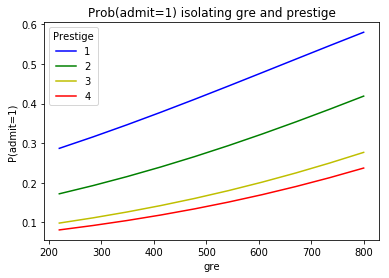

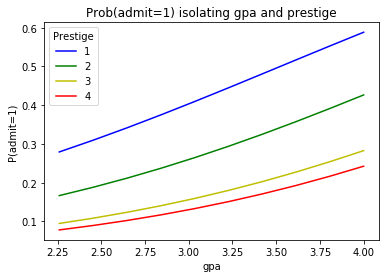

In [268]:
def isolate_and_plot(variable):
    #isolate gre and prestige
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'], aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.loc[grouped.index.get_level_values(1)==col]
        plt.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color = colors[int(col)])
    
    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title = 'Prestige')
    pl.title("Prob(admit=1) isolating "+ variable + " and prestige")
    pl.show()
    
    
isolate_and_plot('gre')
isolate_and_plot('gpa')
    